In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# EXAMPLE 1

In [2]:
def f(x):
    #val = 1. - np.exp(- (x - 1)**2)
    val = x**4 + 2*x**3 + 3 * x**2 + 1
    return val

def df(x):
    #val = -2. * (1 - x) * np.exp(- (x - 1)**2)
    val = 4 * x**3 + 6 * x**2 + 6*x
    return val

def ddf(x):
    #val = 2. * np.exp(- (x - 1)**2) * (1 + 2. * (1 - x)**2)
    val = 12 * x**2 + 12 * x + 6
    return val

In [3]:
n_iters = 4

x_0 = 1.
x_curr = x_0

x_iters = [x_0]
for i in range(1, n_iters):
    print('Iteration: ', i)
    print ('Current x: ', x_curr)
    g = df(x_curr)
    g = np.round(g, 4)
    print('Gradient: ', g)
    h = ddf(x_curr)
    h = np.round(h, 4)
    print('Hessian: ', h)
    x_new = x_curr - g / (h + 10**-8)
    x_new = np.round(x_new, 4)
    x_iters.append(x_new)
    print('New x: ', x_new, '\n')
    x_curr = x_new
x_iters = np.array(x_iters)
f_iters = f(x_iters)

Iteration:  1
Current x:  1.0
Gradient:  16.0
Hessian:  30.0
New x:  0.4667 

Iteration:  2
Current x:  0.4667
Gradient:  4.5137
Hessian:  14.2141
New x:  0.1491 

Iteration:  3
Current x:  0.1491
Gradient:  1.0412
Hessian:  8.056
New x:  0.0199 



In [4]:
N = 100
box = 1.5

x = np.linspace(-box, box, N)
fx = f(x)

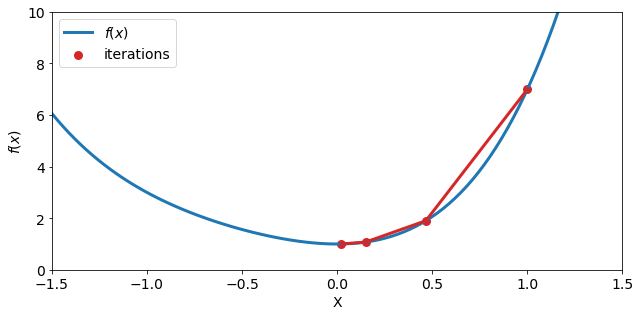

In [5]:
plt.figure(figsize=(9, 4.5))
plt.plot(x, fx, linewidth=3, label=r"$f(x)$")

plt.scatter(x_iters, f_iters, color='C3', linewidth=3, label="iterations")
plt.plot(x_iters, f_iters, color='C3', linewidth=3)

plt.xlabel('X', size=14)
plt.xticks(size=14)

plt.ylabel(r"$f(x)$", size=14)
plt.yticks(size=14)

plt.xlim(-box, box)
plt.ylim(0, 10)

plt.legend(loc='best', fontsize=14)

plt.tight_layout()
plt.savefig(fname="plots/newton_example_1.pdf", format="pdf")
plt.show()

# EXAMPLE 2

In [6]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    val = x1**2 + x2**4 + 1*x1*x2
    return val

def grad(x):
    x1 = x[0]
    x2 = x[1]
    val = np.array([2 * x1 + 1 * x2, 
                    4 * x2**3 + 1 * x1])
    return val

def hess(x):
    x1 = x[0]
    x2 = x[1]
    val = np.array([[2, 1],
                    [1, 12 * x2**2 ]])
    return val

In [7]:
n_iters = 3

x_0 = np.array([0.5, 0.5])

In [8]:
alpha = 0.1
x_curr = x_0
n_iters = 41

x_iters = [x_0]
for i in range(1, n_iters):
    print('Iteration: ', i)
    print ('Current x: ', x_curr)
    g = grad(x_curr)
    g = np.round(g, 4)
    print('Gradient: ', g)
    x_new = x_curr - alpha * g
    x_new = np.round(x_new, 4)
    x_iters.append(x_new)
    print('New x: ', x_new, '\n')
    x_curr = x_new
x_iters = np.array(x_iters)

Iteration:  1
Current x:  [0.5 0.5]
Gradient:  [1.5 1. ]
New x:  [0.35 0.4 ] 

Iteration:  2
Current x:  [0.35 0.4 ]
Gradient:  [1.1   0.606]
New x:  [0.24   0.3394] 

Iteration:  3
Current x:  [0.24   0.3394]
Gradient:  [0.8194 0.3964]
New x:  [0.1581 0.2998] 

Iteration:  4
Current x:  [0.1581 0.2998]
Gradient:  [0.616  0.2659]
New x:  [0.0965 0.2732] 

Iteration:  5
Current x:  [0.0965 0.2732]
Gradient:  [0.4662 0.1781]
New x:  [0.0499 0.2554] 

Iteration:  6
Current x:  [0.0499 0.2554]
Gradient:  [0.3552 0.1165]
New x:  [0.0144 0.2438] 

Iteration:  7
Current x:  [0.0144 0.2438]
Gradient:  [0.2726 0.0724]
New x:  [-0.0129  0.2366] 

Iteration:  8
Current x:  [-0.0129  0.2366]
Gradient:  [0.2108 0.0401]
New x:  [-0.034   0.2326] 

Iteration:  9
Current x:  [-0.034   0.2326]
Gradient:  [0.1646 0.0163]
New x:  [-0.0505  0.231 ] 

Iteration:  10
Current x:  [-0.0505  0.231 ]
Gradient:  [ 0.13   -0.0012]
New x:  [-0.0635  0.2311] 

Iteration:  11
Current x:  [-0.0635  0.2311]
Gradient: 

In [9]:
x_curr = x_0
n_iters = 3

x_iters_newton = [x_0]
for i in range(1, n_iters):
    print('Iteration: ', i)
    print ('Current x: ', x_curr)
    g = grad(x_curr)
    g = np.round(g, 4)
    print('Gradient: ', g)
    h = hess(x_curr)
    h = np.round(h, 4)
    print('Hessian: ', h)
    h_inv = np.linalg.inv(h)
    h_inv = np.round(h_inv, 4)
    print('Hessian inv: ', h_inv)
    x_new = x_curr - np.dot(h_inv, g)
    x_new = np.round(x_new, 4)
    x_iters_newton.append(x_new)
    print('New x: ', x_new, '\n')
    x_curr = x_new
x_iters_newton = np.array(x_iters_newton)

Iteration:  1
Current x:  [0.5 0.5]
Gradient:  [1.5 1. ]
Hessian:  [[2. 1.]
 [1. 3.]]
Hessian inv:  [[ 0.6 -0.2]
 [-0.2  0.4]]
New x:  [-0.2  0.4] 

Iteration:  2
Current x:  [-0.2  0.4]
Gradient:  [0.    0.056]
Hessian:  [[2.   1.  ]
 [1.   1.92]]
Hessian inv:  [[ 0.6761 -0.3521]
 [-0.3521  0.7042]]
New x:  [-0.1803  0.3606] 



In [10]:
# Generate grid
N = 100
box = 0.6
x1 = np.linspace(-box, box, N)
x2 = np.linspace(-box, box, N)

x1_grid, x2_grid = np.meshgrid(x1, x2)
f_grid = f([x1_grid, x2_grid])

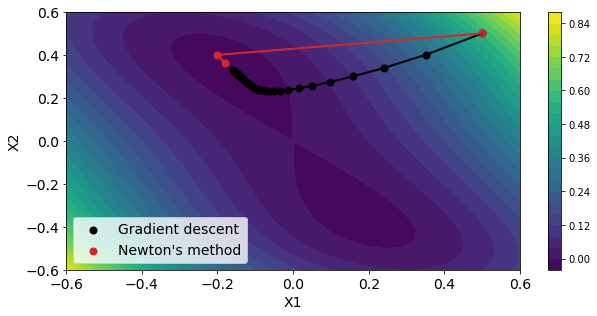

In [11]:
plt.figure(figsize=(9, 4.5))
#plt.contourf(x1, x2, f_grid, levels=np.linspace(-0.1, 1.01, 25))
plt.contourf(x1, x2, f_grid, levels=25)
plt.colorbar()

plt.scatter(x_iters[:, 0], x_iters[:, 1], color='0', linewidth=2, label="Gradient descent")
plt.plot(x_iters[:, 0], x_iters[:, 1], color='0', linewidth=2)

plt.scatter(x_iters_newton[:, 0], x_iters_newton[:, 1], color='C3', linewidth=2, label="Newton's method")
plt.plot(x_iters_newton[:, 0], x_iters_newton[:, 1], color='C3', linewidth=2)

plt.xlabel('X1', size=14)
plt.xticks(size=14)

plt.ylabel('X2', size=14)
plt.yticks(size=14)

plt.xlim(-0.1, 0.5)
plt.ylim(-1.1, 0)

plt.xlim(-box, box)
plt.ylim(-box, box)

plt.legend(loc='best', fontsize=14)

plt.tight_layout()
plt.savefig(fname="plots/newton_example_2.pdf", format="pdf")
plt.show()

# TASK 1

In [12]:
m = 1

def f(x):
    x1 = x[0]
    x2 = x[1]
    val = np.exp(-x1) - np.sin(x1) + m * x2**2
    return val

def grad(x):
    x1 = x[0]
    x2 = x[1]
    val = np.array([-np.exp(-x1) - np.cos(x1), 
                    m * 2 * x2])
    return val

def hess(x):
    x1 = x[0]
    x2 = x[1]
    val = np.array([[np.exp(-x1) + np.sin(x1), 0],
                    [0, m * 2 ]])
    return val

In [13]:
n_iters = 11

x_0 = np.array([-1, 1])

In [14]:
alpha = 0.1
x_curr = x_0

x_iters = [x_0]
for i in range(1, n_iters):
    print('Iteration: ', i)
    print ('Current x: ', x_curr)
    g = grad(x_curr)
    g = np.round(g, 4)
    print('Gradient: ', g)
    x_new = x_curr - alpha * g
    x_new = np.round(x_new, 4)
    x_iters.append(x_new)
    print('New x: ', x_new, '\n')
    x_curr = x_new
x_iters = np.array(x_iters)

Iteration:  1
Current x:  [-1  1]
Gradient:  [-3.2586  2.    ]
New x:  [-0.6741  0.8   ] 

Iteration:  2
Current x:  [-0.6741  0.8   ]
Gradient:  [-2.7435  1.6   ]
New x:  [-0.3998  0.64  ] 

Iteration:  3
Current x:  [-0.3998  0.64  ]
Gradient:  [-2.4127  1.28  ]
New x:  [-0.1585  0.512 ] 

Iteration:  4
Current x:  [-0.1585  0.512 ]
Gradient:  [-2.1592  1.024 ]
New x:  [0.0574 0.4096] 

Iteration:  5
Current x:  [0.0574 0.4096]
Gradient:  [-1.9426  0.8192]
New x:  [0.2517 0.3277] 

Iteration:  6
Current x:  [0.2517 0.3277]
Gradient:  [-1.746   0.6554]
New x:  [0.4263 0.2622] 

Iteration:  7
Current x:  [0.4263 0.2622]
Gradient:  [-1.5634  0.5244]
New x:  [0.5826 0.2098] 

Iteration:  8
Current x:  [0.5826 0.2098]
Gradient:  [-1.3935  0.4196]
New x:  [0.722  0.1678] 

Iteration:  9
Current x:  [0.722  0.1678]
Gradient:  [-1.2363  0.3356]
New x:  [0.8456 0.1342] 

Iteration:  10
Current x:  [0.8456 0.1342]
Gradient:  [-1.0926  0.2684]
New x:  [0.9549 0.1074] 



In [15]:
x_curr = x_0

x_iters_newton = [x_0]
for i in range(1, n_iters):
    print('Iteration: ', i)
    print ('Current x: ', x_curr)
    g = grad(x_curr)
    #g = np.round(g, 4)
    print('Gradient: ', g)
    h = hess(x_curr)
    #h = np.round(h, 4)
    print('Hessian: ', h)
    h_inv = np.linalg.inv(h)
    #h_inv = np.round(h_inv, 4)
    print('Hessian inv: ', h_inv)
    x_new = x_curr - np.dot(h_inv, g)
    #x_new = np.round(x_new, 4)
    x_iters_newton.append(x_new)
    print('New x: ', x_new, '\n')
    x_curr = x_new
x_iters_newton = np.array(x_iters_newton)

Iteration:  1
Current x:  [-1  1]
Gradient:  [-3.25858413  2.        ]
Hessian:  [[1.87681084 0.        ]
 [0.         2.        ]]
Hessian inv:  [[0.53281875 0.        ]
 [0.         0.5       ]]
New x:  [0.73623471 0.        ] 

Iteration:  2
Current x:  [0.73623471 0.        ]
Gradient:  [-1.21991598  0.        ]
Hessian:  [[1.15041636 0.        ]
 [0.         2.        ]]
Hessian inv:  [[0.8692505 0.       ]
 [0.        0.5      ]]
New x:  [1.79664729 0.        ] 

Iteration:  3
Current x:  [1.79664729 0.        ]
Gradient:  [0.05808177 0.        ]
Hessian:  [[1.14045792 0.        ]
 [0.         2.        ]]
Hessian inv:  [[0.87684077 0.        ]
 [0.         0.5       ]]
New x:  [1.74571882 0.        ] 

Iteration:  4
Current x:  [1.74571882 0.        ]
Gradient:  [-0.00048768  0.        ]
Hessian:  [[1.15925953 0.        ]
 [0.         2.        ]]
Hessian inv:  [[0.86261961 0.        ]
 [0.         0.5       ]]
New x:  [1.7461395 0.       ] 

Iteration:  5
Current x:  [1.7461395

In [16]:
# Generate grid
N = 100
box = 2.
x1 = np.linspace(-box, box, N)
x2 = np.linspace(-box, box, N)

x1_grid, x2_grid = np.meshgrid(x1, x2)
f_grid = f([x1_grid, x2_grid])

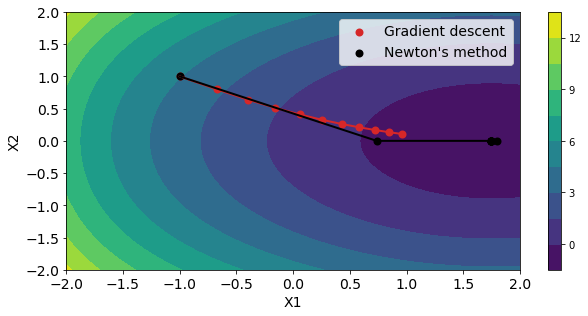

In [17]:
plt.figure(figsize=(9, 4.5))
#plt.contourf(x1, x2, f_grid, levels=np.linspace(-1.1, 2.01, 50))
plt.contourf(x1, x2, f_grid, levels=10)
plt.colorbar()

plt.scatter(x_iters[:, 0], x_iters[:, 1], color='C3', linewidth=2, label="Gradient descent")
plt.plot(x_iters[:, 0], x_iters[:, 1], color='C3', linewidth=2)

plt.scatter(x_iters_newton[:, 0], x_iters_newton[:, 1], color='0', linewidth=2, label="Newton's method")
plt.plot(x_iters_newton[:, 0], x_iters_newton[:, 1], color='0', linewidth=2)

plt.xlabel('X1', size=14)
plt.xticks(size=14)

plt.ylabel('X2', size=14)
plt.yticks(size=14)

plt.xlim(-0.1, 0.5)
plt.ylim(-1.1, 0)

plt.xlim(-box, box)
plt.ylim(-box, box)

plt.legend(loc='best', fontsize=14)

plt.tight_layout()
plt.show()